# <center>**Local Musical Instrument identifier using FFT(Fast Fourier Transform) and convolutional neural network**




# <center> BACKGROUND
Local musical instrument identification using Fast Fourier Transform (FFT) and Convolutional Neural Network (CNN) is a method for recognizing musical instruments from audio recordings in real-time. This approach combines two popular techniques in the field of music information retrieval for improved accuracy and efficiency.

Fast Fourier Transform (FFT): The FFT is an algorithm for transforming signals from the time domain to the frequency domain. In the context of musical instrument recognition, the FFT is used to analyze the frequency content of an audio signal, which can reveal the spectral characteristics of the sound produced by a musical instrument. The FFT is typically used as a pre-processing step to convert the time-domain audio signal into a frequency-domain representation.

Convolutional Neural Network (CNN): A CNN is a type of artificial neural network designed for image recognition tasks, but it can also be applied to audio data. In the context of musical instrument recognition, a CNN is trained on a large dataset of audio recordings of different musical instruments, and it learns to recognize the unique spectral characteristics of each instrument. The CNN takes the frequency-domain representation of an audio signal, obtained from the FFT, as input, and it outputs a prediction of the musical instrument that produced the sound. CNNs are well-suited for processing audio data in the frequency domain, as they can learn to recognize patterns in the spectrogram of an audio signal. CNNs are particularly good at identifying static patterns, such as musical instruments, in audio data and they are relatively fast to train and efficient to run.

The combination of FFT and CNN provides a powerful and efficient method for musical instrument recognition. The FFT pre-processing step enables the CNN to focus on the most important spectral characteristics of the audio signal, reducing the dimensionality of the input data and improving the processing speed. The CNN then uses its learned representations of musical instruments to identify the instrument from the pre-processed audio signal in real-time.


# <center>STATEMENT OF PROBLEM
To develop a real-time system that accurately identifies musical instruments from audio recordings, by combining the spectral analysis of the Fast Fourier Transform (FFT) and the pattern recognition capabilities of a Convolutional Neural Network (CNN). The system should be able to recognize a wide range of musical instruments with high accuracy and efficiency, and provide real-time feedback to musicians or control other systems in response to the detected instruments.

# <center> OBJECTIVE
# General Objective:


> design and implement a real-time system that can accurately identify musical instruments from audio recordings. The system will utilize the combination of FFT and CNN techniques to convert the time-domain audio signal into a frequency-domain representation and then use a trained CNN to make predictions about the musical instrument that produced the sound. The goal is to develop a system that is fast, accurate, and suitable for real-world applications in the fields of music education, musical performance, and audio signal processing.



# <center>METHODOLOGY
The methodology for the Local Musical Instrument identifier using Fast Fourier Transform (FFT) and Convolutional Neural Network (CNN) project can be summarized as follows:


1.  Data Collection: Collect a large dataset of audio recordings of different 
musical instruments. The dataset should be diverse and representative of the variations in playing style, sound quality, and recording conditions that may be encountered in real-world applications.

2. Pre-processing: Apply the Fast Fourier Transform (FFT) to the audio signals in the dataset to convert them into a frequency-domain representation. This will enable the CNN to focus on the spectral characteristics of the audio signals, reducing the dimensionality of the input data and improving the processing speed.

3. Visualization and Analysis of Pre-Processed Data: Plot and visualize the FFT output of the audio signals to inspect the spectral characteristics of the musical instruments. Analyze the patterns and trends in the FFT output to ensure that the pre-processing step has been performed correctly and to gain insights into the spectral characteristics of the musical instruments.

4. Training the CNN: Train a Convolutional Neural Network (CNN) on the pre-processed audio signals to learn the unique spectral characteristics of each musical instrument. The training process will involve optimizing the weights and biases of the CNN using an appropriate loss function and optimization algorithm.

5. Testing: Evaluate the performance of the trained CNN on a separate test dataset, using metrics such as accuracy, precision, recall, and F1 score. The testing process will involve applying the FFT to the audio signals in the test dataset, feeding the frequency-domain representations into the trained CNN, and comparing the predictions with the ground-truth labels.

6. Performance Analysis: Analyze the results of the testing process to understand the strengths and weaknesses of the trained CNN. This can involve visualizing the confusion matrix, examining the distribution of errors, and identifying patterns in the misclassified examples. The analysis can help to identify areas for improvement, such as fine-tuning the CNN architecture, changing the loss function, or modifying the pre-processing step.

7. Refinement: Based on the results of the performance analysis, refine the system by adjusting the CNN architecture, tuning the hyperparameters, or improving the FFT pre-processing step, if necessary. Repeat the training, testing, and performance analysis steps until a satisfactory level of accuracy and efficiency is achieved.

8. Deployment: Integrate the refined CNN into a real-time system for musical instrument identification. The system should be designed to process audio signals in real-time, perform the FFT pre-processing step, and provide the instrument prediction as soon as possible.







# SIMULATION

 **STEP 1**
 Import all the libraries



# New Section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack
import wave
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten,Conv1D
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from Plot import *
import math
from collections import Counter
from tensorflow.keras.models import load_model
import seaborn as sns




In [2]:
df = pd.read_csv('folders_and_files.csv')



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/folders_and_files.csv')
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][0]+"/"+df['file_name'][0])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][0]+"/"+df['file_name'][0])


Output hidden; open in https://colab.research.google.com to view.

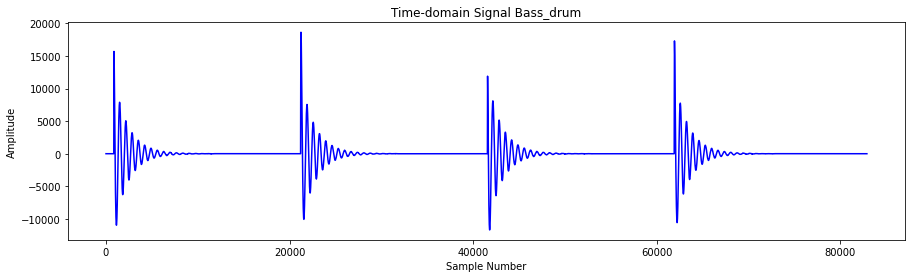

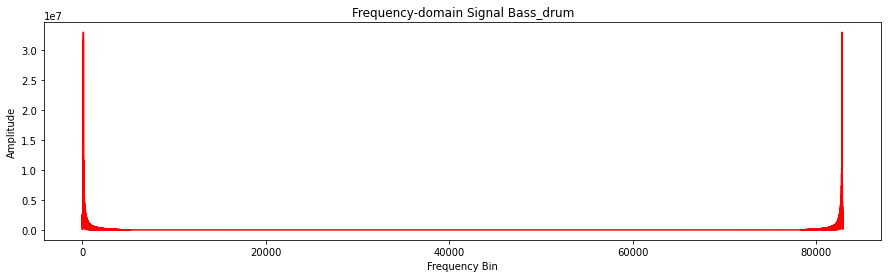

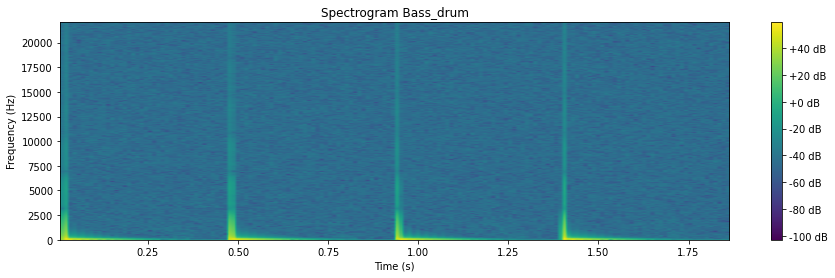

In [5]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][31]+"/"+df['file_name'][31])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][31]+"/"+df['file_name'][31])

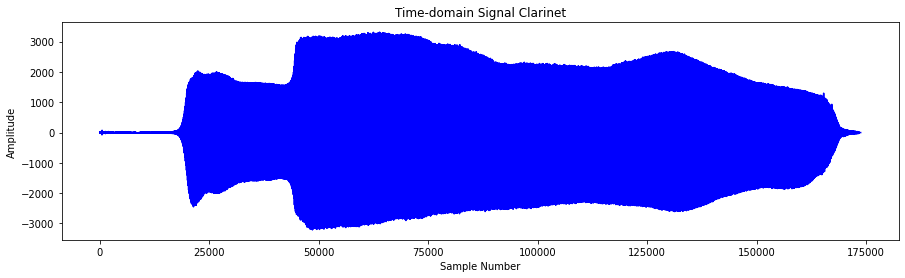

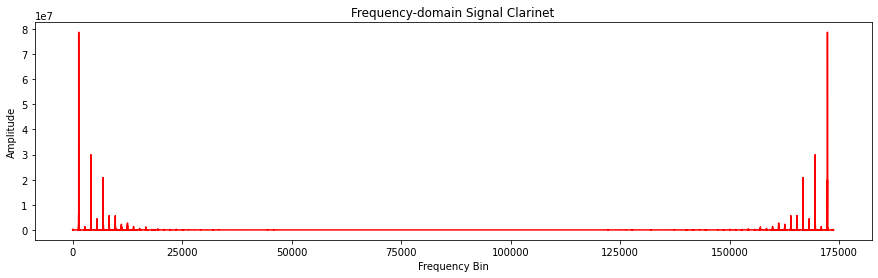

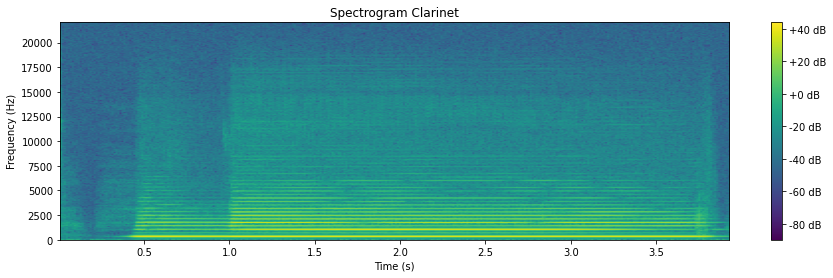

In [6]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][61]+"/"+df['file_name'][61])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][61]+"/"+df['file_name'][61])

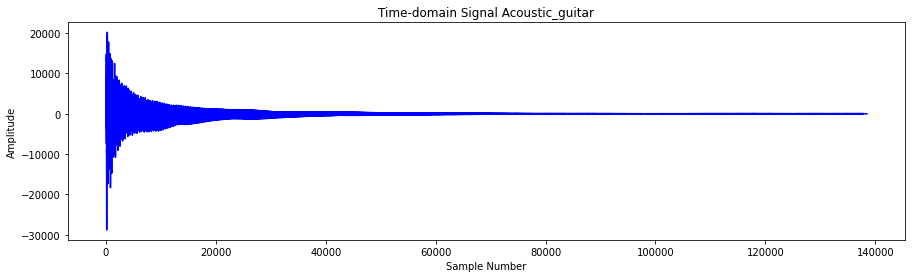

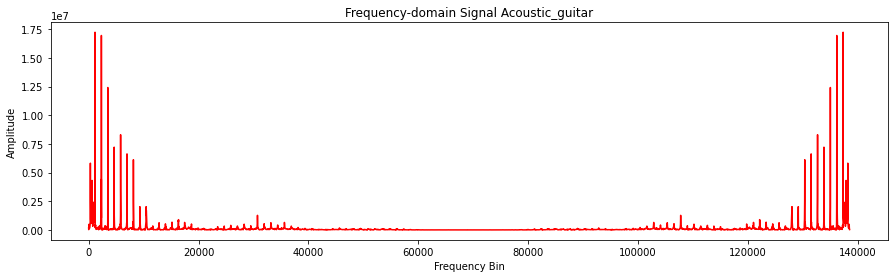

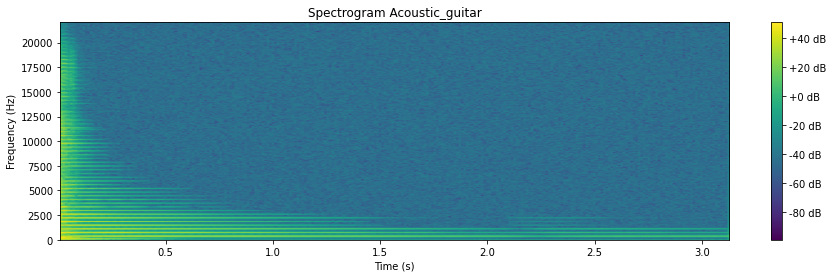

In [7]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][92]+"/"+df['file_name'][92])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][92]+"/"+df['file_name'][92])

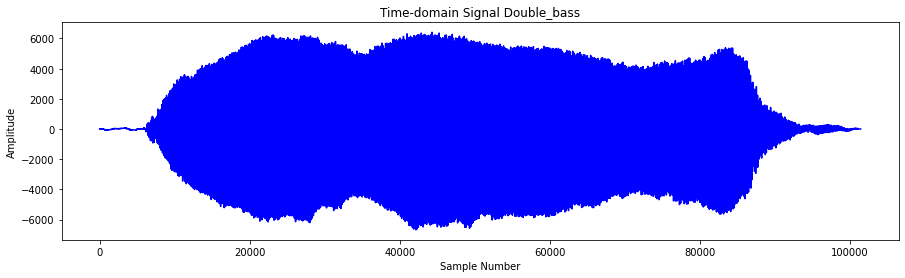

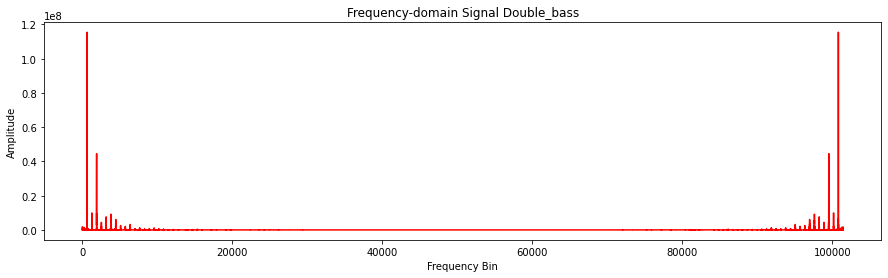

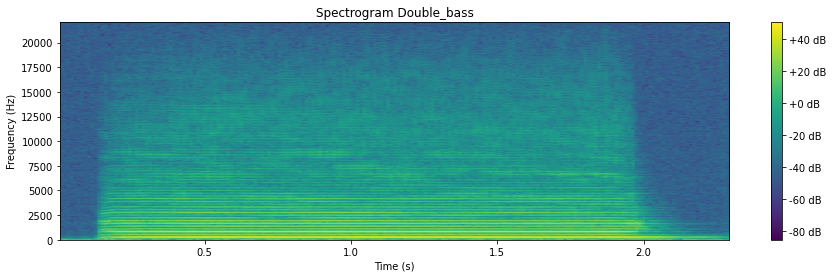

In [8]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][121]+"/"+df['file_name'][121])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][121]+"/"+df['file_name'][121])

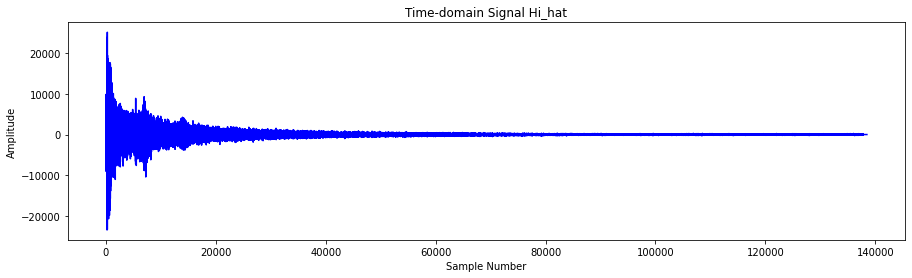

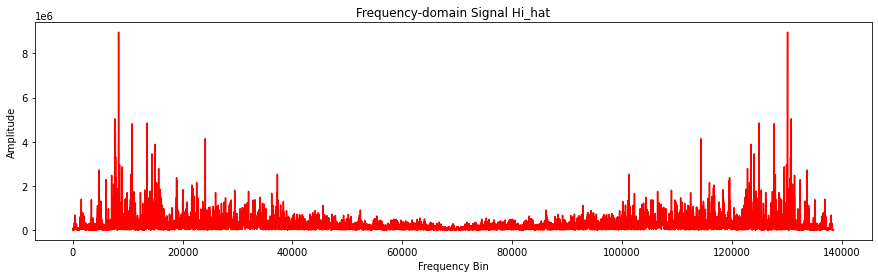

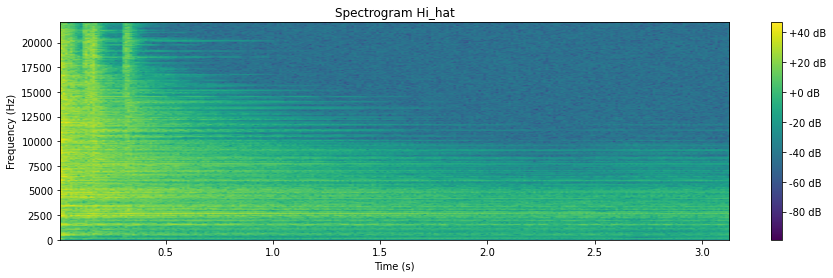

In [9]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][151]+"/"+df['file_name'][151])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][151]+"/"+df['file_name'][151])

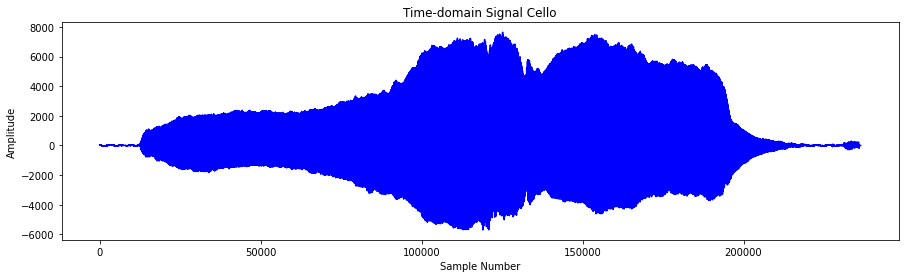

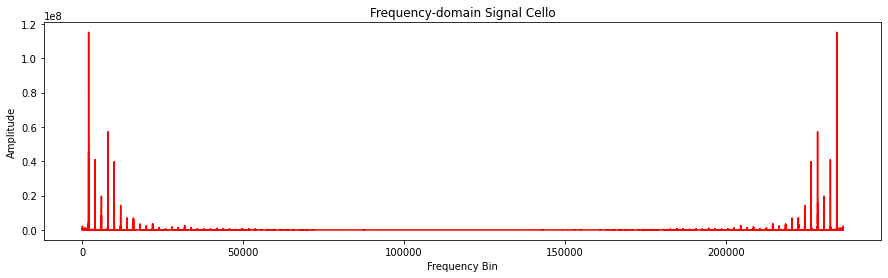

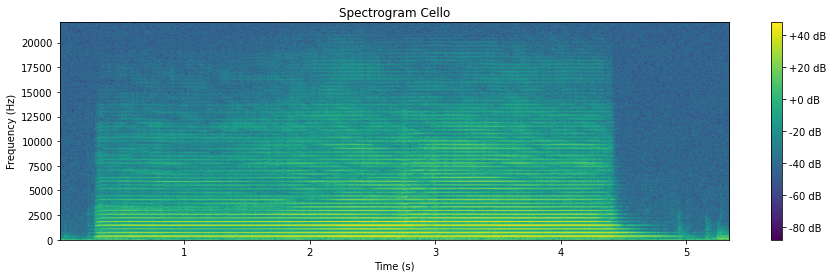

In [10]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][181]+"/"+df['file_name'][181])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][181]+"/"+df['file_name'][181])

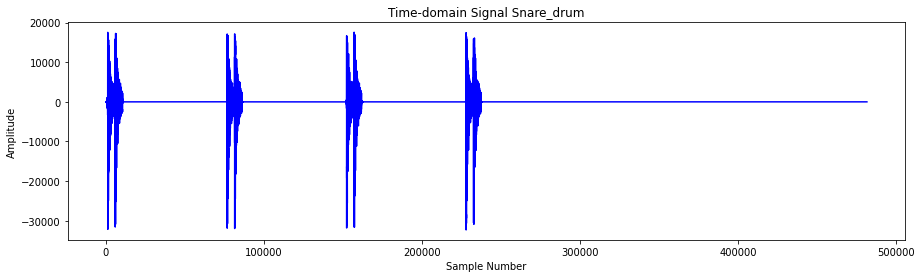

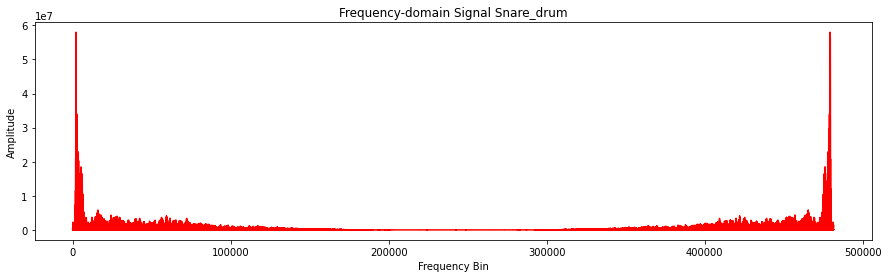

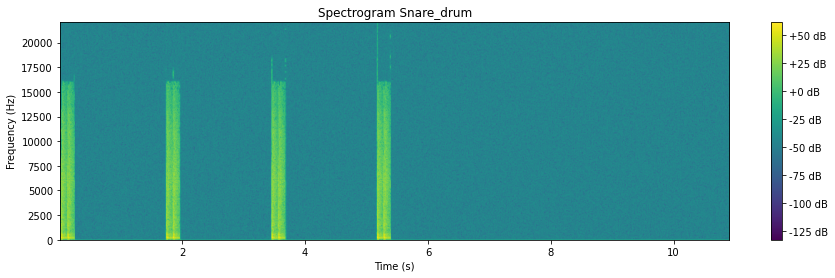

In [11]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][211]+"/"+df['file_name'][211])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][211]+"/"+df['file_name'][211])

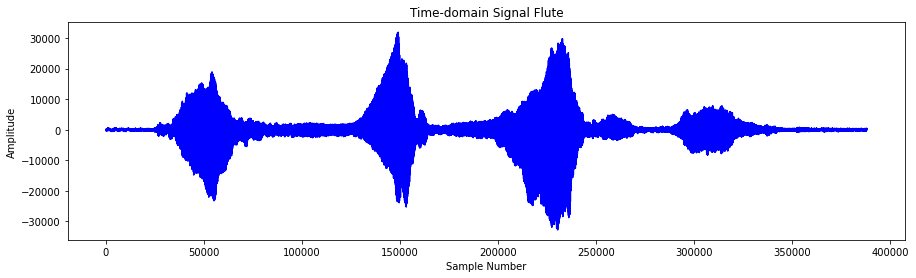

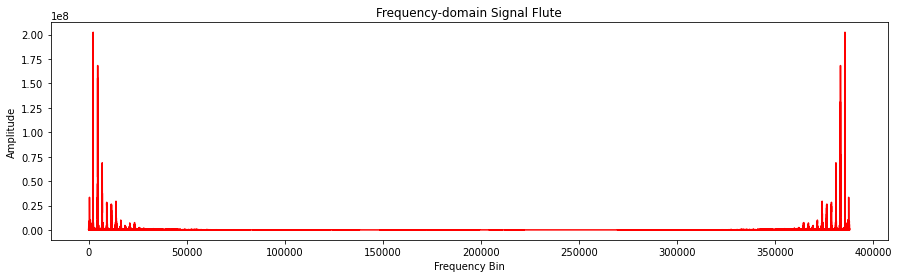

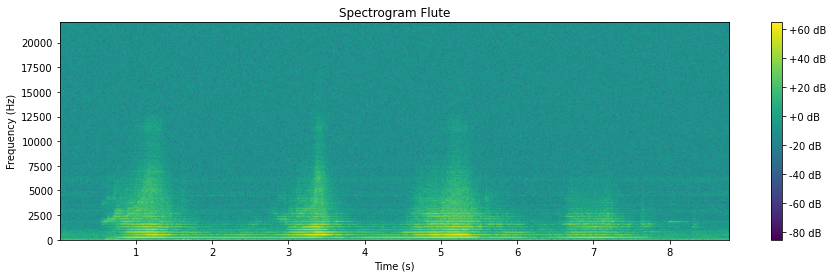

In [12]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][241]+"/"+df['file_name'][241])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][241]+"/"+df['file_name'][241])

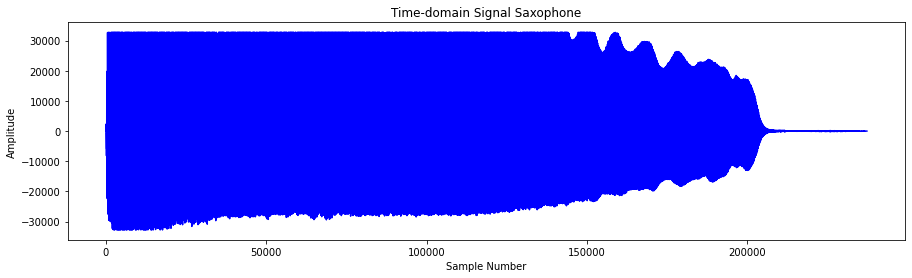

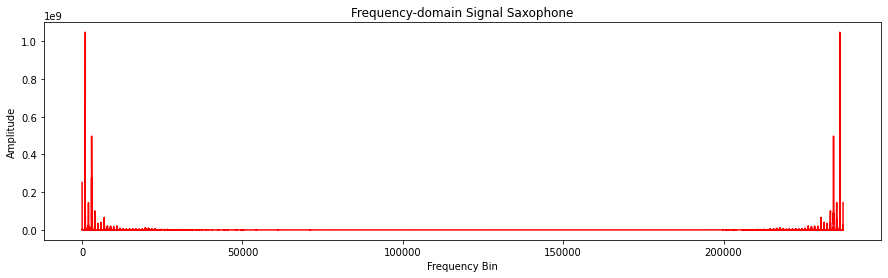

In [17]:
visualize_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][271]+"/"+df['file_name'][271])
play_audio("/content/drive/MyDrive/wavfiles/"+df['folder_name'][271]+"/"+df['file_name'][271])

In [13]:
def preprocess_data(df, window_size=1024, step_size=512):
    """
    Preprocess the audio data stored in the given audio files.
    
    Parameters:
    paths (list of str): A list of paths to the audio files.
    window_size (int, optional): The size of the window for dividing the audio signals. Default is 1024.
    step_size (int, optional): The step size for dividing the audio signals. Default is 512.
    
    Returns:
    signals (numpy array): An array of FFT features, one row per window.
    labels (numpy array): An array of labels, one for each window.
    """
    signals = [] # A list to store the FFT features
    labels = [] # A list to store the labels
    
    # Iterate over each audio file
    for index, path in df.iterrows():
        with wave.open("/content/drive/MyDrive/wavfiles/"+path['folder_name']+"/"+path['file_name'], "rb") as wave_file:
            # Read the audio signal
            signal = wave_file.readframes(wave_file.getnframes())
            signal = np.frombuffer(signal, dtype=np.int16)
            
            # Normalize the audio signal
            signal = signal / np.max(np.abs(signal))
            
            # Divide the audio signal into windows
            num_windows = (len(signal) - window_size) // step_size + 1
            for i in range(num_windows):
                start = i * step_size
                end = start + window_size
                window = signal[start:end]
                # Compute the FFT of each window
                fft = np.fft.rfft(window)
                signals.append(fft)

                # Store the label of the window
                label = path['folder_name']
                labels.append(label)

    # Convert the lists of signals and labels to numpy arrays
    signals = np.array(signals)
    labels = np.array(labels)

    return signals, labels

In [14]:
signals,labels=preprocess_data(df)

In [ ]:
print(labels)

['Violin_or_fiddle' 'Violin_or_fiddle' 'Violin_or_fiddle' ... 'Saxophone'
 'Saxophone' 'Saxophone']


In [ ]:
signals.shape

(130674, 513)

In [15]:
#Encode categorical labels using LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(signals, labels, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Build the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(513,1)))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # 10 classes for 10 musical instruments

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)





Epoch 1/10
2614/2614 [==============================] - 47s 13ms/step - loss: 0.6589 - accuracy: 0.7767 - val_loss: 0.3539 - val_accuracy: 0.8735
Epoch 2/10
2614/2614 [==============================] - 33s 13ms/step - loss: 0.2856 - accuracy: 0.8987 - val_loss: 0.2456 - val_accuracy: 0.9145
Epoch 3/10
2614/2614 [==============================] - 34s 13ms/step - loss: 0.2056 - accuracy: 0.9271 - val_loss: 0.2097 - val_accuracy: 0.9235
Epoch 4/10
817/817 [==============================] - 4s 5ms/step - loss: 0.2072 - accuracy: 0.9248
Test loss: 0.20720797777175903
Test accuracy: 0.9247751832008362


817/817 [==============================] - 3s 4ms/step
                  precision    recall  f1-score   support

 Acoustic_guitar       0.97      0.90      0.94      3534
       Bass_drum       0.57      0.89      0.70       983
           Cello       0.93      0.95      0.94      2603
        Clarinet       0.92      0.94      0.93      3318
     Double_bass       0.94      0.91      0.92      1651
           Flute       0.94      0.93      0.94      4106
          Hi_hat       0.99      0.96      0.97      1792
       Saxophone       0.97      0.95      0.96      3711
      Snare_drum       0.94      0.82      0.87      2074
Violin_or_fiddle       0.92      0.95      0.93      2363

        accuracy                           0.92     26135
       macro avg       0.91      0.92      0.91     26135
    weighted avg       0.93      0.92      0.93     26135



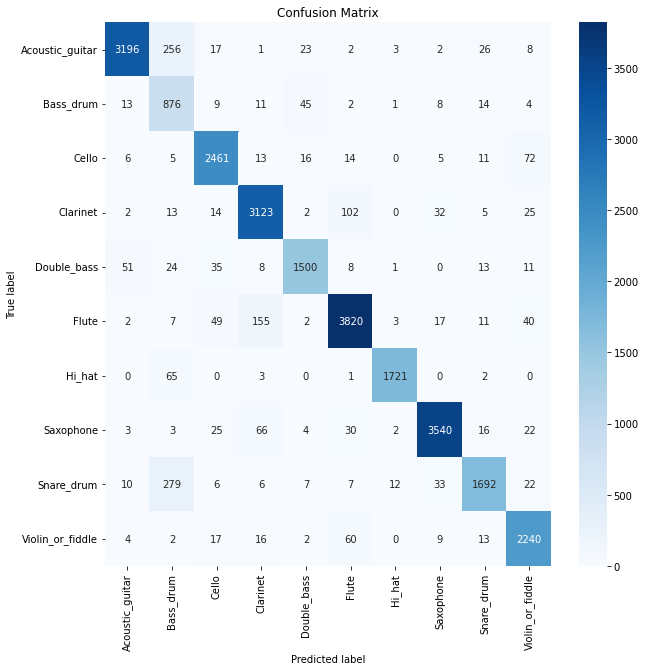

In [18]:
# Predict labels for the testing data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert numerical labels back to their original categorical labels
y_test_classes = encoder.inverse_transform(y_test)
y_pred_classes = encoder.inverse_transform(y_pred_classes)

# Print classification report and confusion matrix
print(classification_report(y_test_classes, y_pred_classes))
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

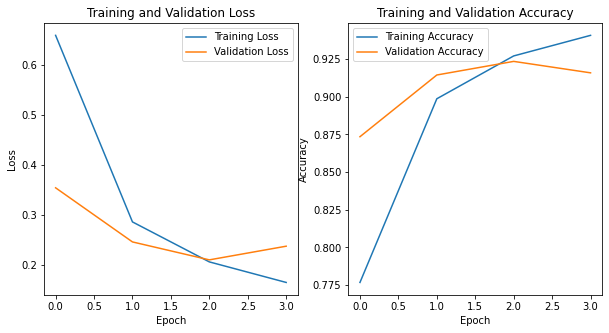

In [19]:
# Plot the training and validation loss and accuracy
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.build
model.save("local_inst_model.h5")

In [20]:

def process_data(path,window_size=1024, step_size=512):
    signals = []
    labels = []

    display(Audio(path))
    with wave.open(path, "rb") as wave_file:
        # Read the audio signal
        signal = wave_file.readframes(wave_file.getnframes())
        signal = np.frombuffer(signal, dtype=np.int16)
        
        # Normalize the audio signal
        signal = signal / np.max(np.abs(signal))
        
        # Divide the audio signal into windows
        num_windows = (len(signal) - window_size) // step_size + 1
        for i in range(num_windows):
            start = i * step_size
            end = start + window_size
            window = signal[start:end]
            # Compute the FFT of each window
            fft = np.fft.rfft(window)
            signals.append(fft)

            # Store the label of the window
            label=path.split("/")[-2]
            labels.append(label)

    return np.array(signals), np.array(labels)


In [22]:

LABELS= {
    0: 'Acoustic_guitar', 
    1: 'Bass_drum', 
    2: 'Cello', 
    3: 'Clarinet', 
    4: 'Double_bass',
    5: 'Flute', 
    6: 'Hi_hat', 
    7: 'Saxophone', 
    8: 'Snare_drum', 
    9: 'Violin_or_fiddle'
    }


In [ ]:
model = load_model('/content/drive/MyDrive/local_inst_model.h5')


In [24]:
signals_test, labels_test = process_data(path="/content/drive/MyDrive/wavfiles/"+df['folder_name'][288]+"/"+df['file_name'][288])
predictions = model.predict(signals_test)
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)
counter = Counter(predicted_labels)
most_common = counter.most_common(1)
print("correct:- "+labels_test[0])
print("predict:- "+LABELS[most_common[0][0]])

32/32 [==============================] - 0s 7ms/step
[7 7 7 ... 7 7 7]
correct:- Saxophone
predict:- Saxophone
